# Practical 1: Power Balancing for a Local Community

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import functions_T1

#Importing the Simulation script
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.insert(0, parent_dir)
from simulation_creator_T1_Balancing import simulation_creator_Balancing

A neighbourhood is connected to the grid as sketched below. For a typical day in the year the neighbourhood has a given demand profile. The given load data is for a year and is given in 15 minute intervals. To cover this demand electricity is taken from the grid.

**Task 1**: The first task entails the analysis of the load profile of the neighbourhood for a day of choice. The following python code plots a typical day based on the given load data and the specified number of houses in the neighbourhood. In the code first the load data is saved in a pandas dataframe and it is ensured that the index is the time. Then the day for which the load is plotted is chosen and a function is calledd to plot the data. Run the code and describe what you can see in the plot. You can vary the day which you want to plot with the day_of_year parameter. 

![T1_basecase](Graphics_T1/T1_basecase.png)

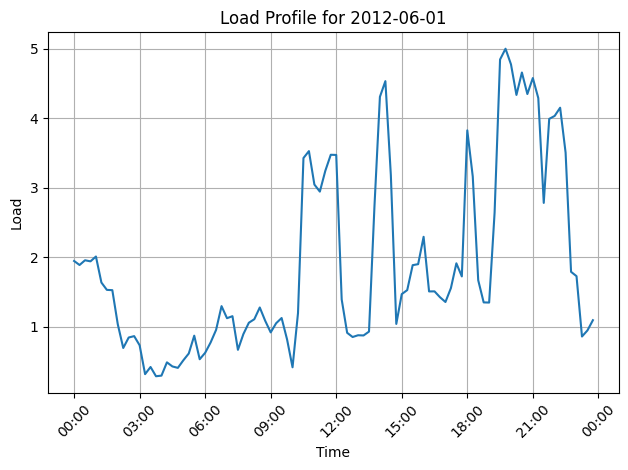

In [2]:
load_df = pd.read_csv('../Scenarios/load_data.txt', delimiter=',', skiprows=1)
load_df['time'] = pd.to_datetime(load_df['time'])
load_df.set_index('time', inplace=True)

#choose which day of the year to plot
day_of_year = "2012-06-01"
number_houses = 5 
plot_load_base_case = functions_T1.plot_load_profile(load_df, day_of_year, number_houses)

The community implements small scale PV and wind power plants to become more autonomous. Now first the supply from the local renewable energy sources is used to cover the demand in the community. The residual load is then supplied by the grid.

![T1_RES_case](Graphics_T1/T1_RES_case.png)

**Task 2**: Run the following python code and look at the resulting residual load plot. Describe the plot and compare it to the results from task 1. Vary the installed PV and Wind power as well as the number of houses in the neighbourhood. Describe your findings.

In [2]:
day_of_year = "2012-06-01"

#Component Set Up
Components_RES_case = pd.DataFrame()
Components_RES_case = pd.Series(['Wind', 'PV', 'Load'])

#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}

RES_case_simulation = simulation_creator_Balancing(Components_RES_case, day_of_year,number_houses,pv_inputs, wind_inputs)




2024-08-23 12:35:56.854 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-08-23 12:35:56.895 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-08-23 12:35:56.927 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...


Collector create: hi
Collector create: bye


2024-08-23 12:35:57.700 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-08-23 12:35:57.782 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:35:57.782 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-08-23 12:35:58.665 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-08-23 12:35:58.705 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:35:58.706 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:35:58.706 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between

from wind %%%%%%%%%% 2012-06-01 00:00:00
from pv %%%%%%%%% 2012-06-01 00:00:00
from load %%%%%%%%%%% 2012-06-01 00:00:00
from controller %%%%%%%%% 2012-06-01 00:00:00
#attrs:  {'wind_gen': {'Wind-0.wind_0': 35.76452525450019}, 'pv_gen': {'PV-0.pv_0': 0.0}, 'load_dem': {'Load-0.load_0': 0.48726106250000006}}
residual load: -36.251786317000196
battery flow: 0
35.76452525450019 0.0 0.48726106250000006 50
from pv %%%%%%%%% 2012-06-01 00:15:00
from wind %%%%%%%%%% 2012-06-01 00:15:00
from load %%%%%%%%%%% 2012-06-01 00:15:00
from controller %%%%%%%%% 2012-06-01 00:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.4727848025}}
residual load: -30.574093311579524
battery flow: 0
30.101308509079523 0.0 0.4727848025 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  3%|▎         | 2813/86400 [00:00<00:13, 6014.68steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  5%|▌         | 4388/86400 [00:00<00:10, 8137.78steps/s]

from pv %%%%%%%%% 2012-06-01 00:30:00
from wind %%%%%%%%%% 2012-06-01 00:30:00
from load %%%%%%%%%%% 2012-06-01 00:30:00
from controller %%%%%%%%% 2012-06-01 00:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 32.33016156040354}, 'load_dem': {'Load-0.load_0': 0.48979253875000006}}
residual load: -32.81995409915354
battery flow: 0
32.33016156040354 0.0 0.48979253875000006 50
from pv %%%%%%%%% 2012-06-01 00:45:00
from wind %%%%%%%%%% 2012-06-01 00:45:00
from load %%%%%%%%%%% 2012-06-01 00:45:00
from controller %%%%%%%%% 2012-06-01 00:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 31.917001586796687}, 'load_dem': {'Load-0.load_0': 0.48588130125}}
residual load: -32.40288288804668
battery flow: 0
31.917001586796687 0.0 0.48588130125 50
from pv %%%%%%%%% 2012-06-01 01:00:00
from wind %%%%%%%%%% 2012-06-01 01:00:00
from load %%%%%%%%%%% 2012-06-01 01:00:00
from controller %%%%%%%%% 2012-06-01 01:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  7%|▋         | 5738/86400 [00:00<00:08, 9261.09steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  8%|▊         | 6751/86400 [00:00<00:08, 9358.26steps/s]

from pv %%%%%%%%% 2012-06-01 01:15:00
from wind %%%%%%%%%% 2012-06-01 01:15:00
from load %%%%%%%%%%% 2012-06-01 01:15:00
from controller %%%%%%%%% 2012-06-01 01:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 22.861674995762083}, 'load_dem': {'Load-0.load_0': 0.40983445374999994}}
residual load: -23.271509449512084
battery flow: 0
22.861674995762083 0.0 0.40983445374999994 50
from pv %%%%%%%%% 2012-06-01 01:30:00
from wind %%%%%%%%%% 2012-06-01 01:30:00
from load %%%%%%%%%%% 2012-06-01 01:30:00
from controller %%%%%%%%% 2012-06-01 01:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.728249901040478}, 'load_dem': {'Load-0.load_0': 0.38339174000000004}}
residual load: -22.111641641040478
battery flow: 0
21.728249901040478 0.0 0.38339174000000004 50
from pv %%%%%%%%% 2012-06-01 01:45:00
from wind %%%%%%%%%% 2012-06-01 01:45:00
from load %%%%%%%%%%% 2012-06-01 01:45:00
from controller %%%%%%%%% 2012-06-01 01:45:00
#attrs:  {'pv_gen':

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
  9%|▉         | 7876/86400 [00:00<00:08, 9651.27steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 11%|█▏        | 9788/86400 [00:01<00:06, 11808.18steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

from pv %%%%%%%%% 2012-06-01 02:00:00
from wind %%%%%%%%%% 2012-06-01 02:00:00
from load %%%%%%%%%%% 2012-06-01 02:00:00
from controller %%%%%%%%% 2012-06-01 02:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.569456987831963}, 'load_dem': {'Load-0.load_0': 0.25974292125}}
residual load: -21.829199909081964
battery flow: 0
21.569456987831963 0.0 0.25974292125 50
from pv %%%%%%%%% 2012-06-01 02:15:00
from wind %%%%%%%%%% 2012-06-01 02:15:00
from load %%%%%%%%%%% 2012-06-01 02:15:00
from controller %%%%%%%%% 2012-06-01 02:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 24.721304640046643}, 'load_dem': {'Load-0.load_0': 0.1746188425}}
residual load: -24.895923482546642
battery flow: 0
24.721304640046643 0.0 0.1746188425 50
from pv %%%%%%%%% 2012-06-01 02:30:00
from wind %%%%%%%%%% 2012-06-01 02:30:00
from load %%%%%%%%%%% 2012-06-01 02:30:00
from controller %%%%%%%%% 2012-06-01 02:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind

 13%|█▎        | 11026/86400 [00:01<00:07, 10320.25steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from controller %%%%%%%%% 2012-06-01 02:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.64875638280169}, 'load_dem': {'Load-0.load_0': 0.21717543374999998}}
residual load: -21.86593181655169
battery flow: 0
21.64875638280169 0.0 0.21717543374999998 50
from pv %%%%%%%%% 2012-06-01 03:00:00
from wind %%%%%%%%%% 2012-06-01 03:00:00
from load %%%%%%%%%%% 2012-06-01 03:00:00
from controller %%%%%%%%% 2012-06-01 03:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.96789756851643}, 'load_dem': {'Load-0.load_0': 0.18428937499999998}}
residual load: -22.15218694351643
battery flow: 0
21.96789756851643 0.0 0.18428937499999998 50
from pv %%%%%%%%% 2012-06-01 03:15:00
from wind %%%%%%%%%% 2012-06-01 03:15:00
from load %%%%%%%%%%% 2012-06-01 03:15:00


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 14%|█▍        | 12151/86400 [00:01<00:08, 8324.11steps/s] C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 15%|█▌        | 13388/86400 [00:01<00:07, 9189.66steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

from controller %%%%%%%%% 2012-06-01 03:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 24.721304640046643}, 'load_dem': {'Load-0.load_0': 0.08056550750000001}}
residual load: -24.801870147546644
battery flow: 0
24.721304640046643 0.0 0.08056550750000001 50
from pv %%%%%%%%% 2012-06-01 03:30:00
from wind %%%%%%%%%% 2012-06-01 03:30:00
from load %%%%%%%%%%% 2012-06-01 03:30:00
from controller %%%%%%%%% 2012-06-01 03:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 24.98244303490758}, 'load_dem': {'Load-0.load_0': 0.10626150125}}
residual load: -25.08870453615758
battery flow: 0
24.98244303490758 0.0 0.10626150125 50
from pv %%%%%%%%% 2012-06-01 03:45:00
from wind %%%%%%%%%% 2012-06-01 03:45:00
from load %%%%%%%%%%% 2012-06-01 03:45:00
from controller %%%%%%%%% 2012-06-01 03:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 23.27582579700007}, 'load_dem': {'Load-0.load_0': 0.07300557125}}
residual load: -23.

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 19%|█▉        | 16426/86400 [00:01<00:06, 11059.79steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 20%|██        | 17663/86400 [00:01<00:06, 11390.79steps/s]

from pv %%%%%%%%% 2012-06-01 04:15:00
from wind %%%%%%%%%% 2012-06-01 04:15:00
from load %%%%%%%%%%% 2012-06-01 04:15:00
from controller %%%%%%%%% 2012-06-01 04:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.937133399773279}, 'load_dem': {'Load-0.load_0': 0.123025285}}
residual load: -10.06015868477328
battery flow: 0
9.937133399773279 0.0 0.123025285 50
from pv %%%%%%%%% 2012-06-01 04:30:00
from wind %%%%%%%%%% 2012-06-01 04:30:00
from load %%%%%%%%%%% 2012-06-01 04:30:00
from controller %%%%%%%%% 2012-06-01 04:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.933567437692412}, 'load_dem': {'Load-0.load_0': 0.10827199250000001}}
residual load: -9.041839430192413
battery flow: 0
8.933567437692412 0.0 0.10827199250000001 50
from pv %%%%%%%%% 2012-06-01 04:45:00
from wind %%%%%%%%%% 2012-06-01 04:45:00
from load %%%%%%%%%%% 2012-06-01 04:45:00
from controller %%%%%%%%% 2012-06-01 04:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, '

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 22%|██▏       | 19351/86400 [00:01<00:05, 12736.36steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from controller %%%%%%%%% 2012-06-01 05:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 17.701372389566405}, 'wind_gen': {'Wind-0.wind_0': 11.526929247793102}, 'load_dem': {'Load-0.load_0': 0.154812705}}
residual load: 6.019630436773301
battery flow: 0
11.526929247793102 17.701372389566405 0.154812705 50
from pv %%%%%%%%% 2012-06-01 05:30:00
from wind %%%%%%%%%% 2012-06-01 05:30:00
from load %%%%%%%%%%% 2012-06-01 05:30:00
from controller %%%%%%%%% 2012-06-01 05:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 31.125634031392703}, 'wind_gen': {'Wind-0.wind_0': 12.11023949286952}, 'load_dem': {'Load-0.load_0': 0.21883026125}}
residual load: 18.796564277273184
battery flow: 0
12.11023949286952 31.125634031392703 0.21883026125 50
from pv %%%%%%%%% 2012-06-01 05:45:00
from wind %%%%%%%%%% 2012-06-01 05:45:00
from load %%%%%%%%%%% 2012-06-01 05:45:00
from controller %%%%%%%%% 2012-06-01 05:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 213.06564549874648}, 'wind_gen': {'Wind-0.wind_0': 13.39279978905828}, 'load_de

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 27%|██▋       | 23063/86400 [00:02<00:04, 13635.39steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 28%|██▊       | 24526/86400 [00:02<00:05, 10905.50steps/s]

from controller %%%%%%%%% 2012-06-01 06:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 33.3835124700914}, 'wind_gen': {'Wind-0.wind_0': 17.707503965089543}, 'load_dem': {'Load-0.load_0': 0.1944144175}}
residual load: 15.481594087501854
battery flow: 0
17.707503965089543 33.3835124700914 0.1944144175 50
from pv %%%%%%%%% 2012-06-01 06:30:00
from wind %%%%%%%%%% 2012-06-01 06:30:00
from load %%%%%%%%%%% 2012-06-01 06:30:00
from controller %%%%%%%%% 2012-06-01 06:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 342.8453139927262}, 'wind_gen': {'Wind-0.wind_0': 21.41143961844171}, 'load_dem': {'Load-0.load_0': 0.23959497249999998}}
residual load: 321.19427940178446
battery flow: 0
21.41143961844171 342.8453139927262 0.23959497249999998 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 30%|██▉       | 25763/86400 [00:02<00:06, 9869.24steps/s] C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from pv %%%%%%%%% 2012-06-01 06:45:00
from wind %%%%%%%%%% 2012-06-01 06:45:00
from load %%%%%%%%%%% 2012-06-01 06:45:00
from controller %%%%%%%%% 2012-06-01 06:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 77.89516063586485}, 'wind_gen': {'Wind-0.wind_0': 15.76908467740246}, 'load_dem': {'Load-0.load_0': 0.32497488875}}
residual load: 61.80110106971239
battery flow: 0
15.76908467740246 77.89516063586485 0.32497488875 50
from pv %%%%%%%%% 2012-06-01 07:00:00
from wind %%%%%%%%%% 2012-06-01 07:00:00
from load %%%%%%%%%%% 2012-06-01 07:00:00
from controller %%%%%%%%% 2012-06-01 07:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 157.341222169919}, 'wind_gen': {'Wind-0.wind_0': 10.27152856889632}, 'load_dem': {'Load-0.load_0': 0.281626135}}
residual load: 146.78806746602268
battery flow: 0
10.27152856889632 157.341222169919 0.281626135 50
from pv %%%%%%%%% 2012-06-01 07:15:00
from wind %%%%%%%%%% 2012-06-01 07:15:00
from load %%%%%%%%%%% 2012-06-01 07:15:00
from controller %%%%%%%%% 2012-06-01 07:15:00


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 32%|███▏      | 27338/86400 [00:02<00:05, 10700.80steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 34%|███▍      | 29251/86400 [00:02<00:04, 12355.13steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

from pv %%%%%%%%% 2012-06-01 07:30:00
from wind %%%%%%%%%% 2012-06-01 07:30:00
from load %%%%%%%%%%% 2012-06-01 07:30:00
from controller %%%%%%%%% 2012-06-01 07:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 88.03271624025432}, 'wind_gen': {'Wind-0.wind_0': 6.725155590333484}, 'load_dem': {'Load-0.load_0': 0.16794858}}
residual load: 81.13961206992083
battery flow: 0
6.725155590333484 88.03271624025432 0.16794858 50
from pv %%%%%%%%% 2012-06-01 07:45:00
from wind %%%%%%%%%% 2012-06-01 07:45:00
from load %%%%%%%%%%% 2012-06-01 07:45:00
from controller %%%%%%%%% 2012-06-01 07:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 297.22984936328197}, 'wind_gen': {'Wind-0.wind_0': 4.884960659625227}, 'load_dem': {'Load-0.load_0': 0.22453109875}}
residual load: 292.12035760490676
battery flow: 0
4.884960659625227 297.22984936328197 0.22453109875 50
from pv %%%%%%%%% 2012-06-01 08:00:00
from wind %%%%%%%%%% 2012-06-01 08:00:00
from load %%%%%%%%%%% 2012-06-01 08:00:00
from controller %%%%%%%%% 2012-06-01 08:00:0

 36%|███▌      | 31051/86400 [00:02<00:04, 13370.36steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 38%|███▊      | 32513/86400 [00:03<00:04, 11458.06steps/s]

from controller %%%%%%%%% 2012-06-01 08:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 447.0993475478892}, 'wind_gen': {'Wind-0.wind_0': 5.402499425605091}, 'load_dem': {'Load-0.load_0': 0.32015740125}}
residual load: 441.3766907210341
battery flow: 0
5.402499425605091 447.0993475478892 0.32015740125 50
from pv %%%%%%%%% 2012-06-01 08:45:00
from wind %%%%%%%%%% 2012-06-01 08:45:00
from load %%%%%%%%%%% 2012-06-01 08:45:00
from controller %%%%%%%%% 2012-06-01 08:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 96.91474617404022}, 'wind_gen': {'Wind-0.wind_0': 5.03358025576729}, 'load_dem': {'Load-0.load_0': 0.27204843875}}
residual load: 91.60911747952292
battery flow: 0
5.03358025576729 96.91474617404022 0.27204843875 50
from pv %%%%%%%%% 2012-06-01 09:00:00
from wind %%%%%%%%%% 2012-06-01 09:00:00
from load %%%%%%%%%%% 2012-06-01 09:00:00
from controller %%%%%%%%% 2012-06-01 09:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 135.52077638405348}, 'wind_gen': {'Wind-0.wind_0': 6.40269109177492}, 'load_dem': {'

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 39%|███▉      | 33751/86400 [00:03<00:04, 11023.44steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 40%|████      | 34988/86400 [00:03<00:04, 10317.81steps/s]

from controller %%%%%%%%% 2012-06-01 09:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 483.36389810224654}, 'wind_gen': {'Wind-0.wind_0': 9.380910430615765}, 'load_dem': {'Load-0.load_0': 0.26358854}}
residual load: 473.7193991316308
battery flow: 0
9.380910430615765 483.36389810224654 0.26358854 50
from pv %%%%%%%%% 2012-06-01 09:30:00
from wind %%%%%%%%%% 2012-06-01 09:30:00
from load %%%%%%%%%%% 2012-06-01 09:30:00
from controller %%%%%%%%% 2012-06-01 09:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 72.43200766533042}, 'wind_gen': {'Wind-0.wind_0': 7.877920314617755}, 'load_dem': {'Load-0.load_0': 0.28226510125}}
residual load: 64.27182224946266
battery flow: 0
7.877920314617755 72.43200766533042 0.28226510125 50
from pv %%%%%%%%% 2012-06-01 09:45:00
from wind %%%%%%%%%% 2012-06-01 09:45:00
from load %%%%%%%%%%% 2012-06-01 09:45:00
from controller %%%%%%%%% 2012-06-01 09:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 134.59077411215878}, 'wind_gen': {'Wind-0.wind_0': 6.946037494284026}, 'load_dem': {'L

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 42%|████▏     | 36113/86400 [00:03<00:05, 9596.46steps/s] C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 43%|████▎     | 37126/86400 [00:03<00:05, 9688.99steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

from pv %%%%%%%%% 2012-06-01 10:00:00
from wind %%%%%%%%%% 2012-06-01 10:00:00
from load %%%%%%%%%%% 2012-06-01 10:00:00
from controller %%%%%%%%% 2012-06-01 10:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 473.8899765233873}, 'wind_gen': {'Wind-0.wind_0': 16.288903442535922}, 'load_dem': {'Load-0.load_0': 0.105212065}}
residual load: 457.4958610158514
battery flow: 0
16.288903442535922 473.8899765233873 0.105212065 50
from pv %%%%%%%%% 2012-06-01 10:15:00
from wind %%%%%%%%%% 2012-06-01 10:15:00
from load %%%%%%%%%%% 2012-06-01 10:15:00
from controller %%%%%%%%% 2012-06-01 10:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 162.57075852589827}, 'wind_gen': {'Wind-0.wind_0': 12.164222650555097}, 'load_dem': {'Load-0.load_0': 0.30001804}}
residual load: 150.10651783534317
battery flow: 0
12.164222650555097 162.57075852589827 0.30001804 50
from pv %%%%%%%%% 2012-06-01 10:30:00
from wind %%%%%%%%%% 2012-06-01 10:30:00
from load %%%%%%%%%%% 2012-06-01 10:30:00
from controller %%%%%%%%% 2012-06-01 10:30:0

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 45%|████▌     | 39263/86400 [00:03<00:05, 8520.02steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 46%|████▋     | 40163/86400 [00:04<00:06, 7590.78steps/s]

from pv %%%%%%%%% 2012-06-01 10:45:00
from wind %%%%%%%%%% 2012-06-01 10:45:00
from load %%%%%%%%%%% 2012-06-01 10:45:00
from controller %%%%%%%%% 2012-06-01 10:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 579.9161254834177}, 'wind_gen': {'Wind-0.wind_0': 17.43118903045535}, 'load_dem': {'Load-0.load_0': 0.882032055}}
residual load: 561.6029043979623
battery flow: 0
17.43118903045535 579.9161254834177 0.882032055 50
from pv %%%%%%%%% 2012-06-01 11:00:00
from wind %%%%%%%%%% 2012-06-01 11:00:00
from load %%%%%%%%%%% 2012-06-01 11:00:00
from controller %%%%%%%%% 2012-06-01 11:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 131.648996949136}, 'wind_gen': {'Wind-0.wind_0': 28.071628344524374}, 'load_dem': {'Load-0.load_0': 0.7619126199999999}}
residual load: 102.81545598461163
battery flow: 0
28.071628344524374 131.648996949136 0.7619126199999999 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 49%|████▉     | 42188/86400 [00:04<00:04, 10056.43steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 50%|█████     | 43313/86400 [00:04<00:04, 9736.10steps/s] 

from pv %%%%%%%%% 2012-06-01 11:15:00
from wind %%%%%%%%%% 2012-06-01 11:15:00
from load %%%%%%%%%%% 2012-06-01 11:15:00
from controller %%%%%%%%% 2012-06-01 11:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 130.3877079411406}, 'wind_gen': {'Wind-0.wind_0': 23.863996085028973}, 'load_dem': {'Load-0.load_0': 0.7365055462500001}}
residual load: 105.78720630986165
battery flow: 0
23.863996085028973 130.3877079411406 0.7365055462500001 50
from pv %%%%%%%%% 2012-06-01 11:30:00
from wind %%%%%%%%%% 2012-06-01 11:30:00
from load %%%%%%%%%%% 2012-06-01 11:30:00
from controller %%%%%%%%% 2012-06-01 11:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 160.61860915594409}, 'wind_gen': {'Wind-0.wind_0': 29.21987365128263}, 'load_dem': {'Load-0.load_0': 0.8110779487499999}}
residual load: 130.58765755591145
battery flow: 0
29.21987365128263 160.61860915594409 0.8110779487499999 50
from pv %%%%%%%%% 2012-06-01 11:45:00
from wind %%%%%%%%%% 2012-06-01 11:45:00
from load %%%%%%%%%%% 2012-06-01 11:45:00
from controller

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 51%|█████▏    | 44326/86400 [00:04<00:05, 8367.98steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 52%|█████▏    | 45226/86400 [00:04<00:05, 7769.19steps/s]

from pv %%%%%%%%% 2012-06-01 12:00:00
from wind %%%%%%%%%% 2012-06-01 12:00:00
from load %%%%%%%%%%% 2012-06-01 12:00:00
from controller %%%%%%%%% 2012-06-01 12:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 243.59209991259948}, 'wind_gen': {'Wind-0.wind_0': 29.316949564243362}, 'load_dem': {'Load-0.load_0': 0.86827531375}}
residual load: 213.40687503460612
battery flow: 0
29.316949564243362 243.59209991259948 0.86827531375 50
from pv %%%%%%%%% 2012-06-01 12:15:00
from wind %%%%%%%%%% 2012-06-01 12:15:00
from load %%%%%%%%%%% 2012-06-01 12:15:00
from controller %%%%%%%%% 2012-06-01 12:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 210.37020651966526}, 'wind_gen': {'Wind-0.wind_0': 26.406287061109243}, 'load_dem': {'Load-0.load_0': 0.34898565625}}
residual load: 183.614933802306
battery flow: 0
26.406287061109243 210.37020651966526 0.34898565625 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 54%|█████▎    | 46351/86400 [00:04<00:04, 8569.97steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exist

from pv %%%%%%%%% 2012-06-01 12:30:00
from wind %%%%%%%%%% 2012-06-01 12:30:00
from load %%%%%%%%%%% 2012-06-01 12:30:00
from controller %%%%%%%%% 2012-06-01 12:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 191.32254094703302}, 'wind_gen': {'Wind-0.wind_0': 23.694948337219877}, 'load_dem': {'Load-0.load_0': 0.2291436875}}
residual load: 167.39844892231315
battery flow: 0
23.694948337219877 191.32254094703302 0.2291436875 50
from pv %%%%%%%%% 2012-06-01 12:45:00
from wind %%%%%%%%%% 2012-06-01 12:45:00
from load %%%%%%%%%%% 2012-06-01 12:45:00
from controller %%%%%%%%% 2012-06-01 12:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 264.1150014385639}, 'wind_gen': {'Wind-0.wind_0': 23.359251616667443}, 'load_dem': {'Load-0.load_0': 0.21402349125}}
residual load: 240.5417263306465
battery flow: 0
23.359251616667443 264.1150014385639 0.21402349125 50
from pv %%%%%%%%% 2012-06-01 13:00:00
from wind %%%%%%%%%% 2012-06-01 13:00:00
from load %%%%%%%%%%% 2012-06-01 13:00:00
from controller %%%%%%%%% 2012-06-01

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 57%|█████▋    | 49163/86400 [00:05<00:04, 8163.27steps/s]

from pv %%%%%%%%% 2012-06-01 13:15:00
from wind %%%%%%%%%% 2012-06-01 13:15:00
from load %%%%%%%%%%% 2012-06-01 13:15:00
from controller %%%%%%%%% 2012-06-01 13:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 145.35248798553044}, 'wind_gen': {'Wind-0.wind_0': 21.41143961844171}, 'load_dem': {'Load-0.load_0': 0.21955088125}}
residual load: 123.72149748583874
battery flow: 0
21.41143961844171 145.35248798553044 0.21955088125 50
from pv %%%%%%%%% 2012-06-01 13:30:00
from wind %%%%%%%%%% 2012-06-01 13:30:00
from load %%%%%%%%%%% 2012-06-01 13:30:00
from controller %%%%%%%%% 2012-06-01 13:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 330.3924277071239}, 'wind_gen': {'Wind-0.wind_0': 23.694948337219877}, 'load_dem': {'Load-0.load_0': 0.23344129125}}
residual load: 306.46403807865397
battery flow: 0
23.694948337219877 330.3924277071239 0.23344129125 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 58%|█████▊    | 50063/86400 [00:05<00:04, 8284.33steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 60%|█████▉    | 51638/86400 [00:05<00:03, 9501.03steps/s]

from pv %%%%%%%%% 2012-06-01 13:45:00
from wind %%%%%%%%%% 2012-06-01 13:45:00
from load %%%%%%%%%%% 2012-06-01 13:45:00
from controller %%%%%%%%% 2012-06-01 13:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 237.49044363102877}, 'wind_gen': {'Wind-0.wind_0': 25.510223860056925}, 'load_dem': {'Load-0.load_0': 0.683302705}}
residual load: 211.29691706597185
battery flow: 0
25.510223860056925 237.49044363102877 0.683302705 50
from pv %%%%%%%%% 2012-06-01 14:00:00
from wind %%%%%%%%%% 2012-06-01 14:00:00
from load %%%%%%%%%%% 2012-06-01 14:00:00
from controller %%%%%%%%% 2012-06-01 14:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 234.76018479924969}, 'wind_gen': {'Wind-0.wind_0': 18.841962880920963}, 'load_dem': {'Load-0.load_0': 1.0772118962500001}}
residual load: 214.84101002207873
battery flow: 0
18.841962880920963 234.76018479924969 1.0772118962500001 50
from pv %%%%%%%%% 2012-06-01 14:15:00
from wind %%%%%%%%%% 2012-06-01 14:15:00
from load %%%%%%%%%%% 2012-06-01 14:15:00


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 61%|██████    | 52651/86400 [00:05<00:04, 7471.00steps/s]

from controller %%%%%%%%% 2012-06-01 14:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 260.34973105253323}, 'wind_gen': {'Wind-0.wind_0': 38.962093524662656}, 'load_dem': {'Load-0.load_0': 1.13351536625}}
residual load: 220.2541221616206
battery flow: 0
38.962093524662656 260.34973105253323 1.13351536625 50
from pv %%%%%%%%% 2012-06-01 14:30:00
from wind %%%%%%%%%% 2012-06-01 14:30:00
from load %%%%%%%%%%% 2012-06-01 14:30:00
from controller %%%%%%%%% 2012-06-01 14:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 246.95781585252965}, 'wind_gen': {'Wind-0.wind_0': 38.145549550921025}, 'load_dem': {'Load-0.load_0': 0.79622106125}}
residual load: 208.0160452403586
battery flow: 0
38.145549550921025 246.95781585252965 0.79622106125 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 62%|██████▏   | 53551/86400 [00:05<00:04, 6949.46steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 64%|██████▍   | 55238/86400 [00:05<00:03, 9018.70steps/s]

from pv %%%%%%%%% 2012-06-01 14:45:00
from wind %%%%%%%%%% 2012-06-01 14:45:00
from load %%%%%%%%%%% 2012-06-01 14:45:00
from controller %%%%%%%%% 2012-06-01 14:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 280.5084605829591}, 'wind_gen': {'Wind-0.wind_0': 30.101308509079523}, 'load_dem': {'Load-0.load_0': 0.261037535}}
residual load: 250.14611453887957
battery flow: 0
30.101308509079523 280.5084605829591 0.261037535 50
from pv %%%%%%%%% 2012-06-01 15:00:00
from wind %%%%%%%%%% 2012-06-01 15:00:00
from load %%%%%%%%%%% 2012-06-01 15:00:00
from controller %%%%%%%%% 2012-06-01 15:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 138.03980154781465}, 'wind_gen': {'Wind-0.wind_0': 33.48470301887081}, 'load_dem': {'Load-0.load_0': 0.3681733325}}
residual load: 104.18692519644384
battery flow: 0
33.48470301887081 138.03980154781465 0.3681733325 50
from pv %%%%%%%%% 2012-06-01 15:15:00
from wind %%%%%%%%%% 2012-06-01 15:15:00
from load %%%%%%%%%%% 2012-06-01 15:15:00
from controller %%%%%%%%% 2012-06-01 15:1

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 65%|██████▌   | 56363/86400 [00:05<00:03, 7680.00steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 67%|██████▋   | 57488/86400 [00:06<00:03, 8282.45steps/s]

from pv %%%%%%%%% 2012-06-01 15:30:00
from wind %%%%%%%%%% 2012-06-01 15:30:00
from load %%%%%%%%%%% 2012-06-01 15:30:00
from controller %%%%%%%%% 2012-06-01 15:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 203.08668432860833}, 'wind_gen': {'Wind-0.wind_0': 27.695674065146253}, 'load_dem': {'Load-0.load_0': 0.4722222075}}
residual load: 174.91878805596207
battery flow: 0
27.695674065146253 203.08668432860833 0.4722222075 50
from pv %%%%%%%%% 2012-06-01 15:45:00
from wind %%%%%%%%%% 2012-06-01 15:45:00
from load %%%%%%%%%%% 2012-06-01 15:45:00
from controller %%%%%%%%% 2012-06-01 15:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 204.03957458300968}, 'wind_gen': {'Wind-0.wind_0': 28.546335875818997}, 'load_dem': {'Load-0.load_0': 0.47579471249999994}}
residual load: 175.01744399469067
battery flow: 0
28.546335875818997 204.03957458300968 0.47579471249999994 50
from pv %%%%%%%%% 2012-06-01 16:00:00
from wind %%%%%%%%%% 2012-06-01 16:00:00
from load %%%%%%%%%%% 2012-06-01 16:00:00
from controller %%%%%

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 70%|███████   | 60751/86400 [00:06<00:0

from pv %%%%%%%%% 2012-06-01 16:45:00
from wind %%%%%%%%%% 2012-06-01 16:45:00
from load %%%%%%%%%%% 2012-06-01 16:45:00
from controller %%%%%%%%% 2012-06-01 16:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 100.7534470734062}, 'wind_gen': {'Wind-0.wind_0': 15.072561409560961}, 'load_dem': {'Load-0.load_0': 0.35697508125}}
residual load: 85.32391058259525
battery flow: 0
15.072561409560961 100.7534470734062 0.35697508125 50
from pv %%%%%%%%% 2012-06-01 17:00:00
from wind %%%%%%%%%% 2012-06-01 17:00:00
from load %%%%%%%%%%% 2012-06-01 17:00:00
from controller %%%%%%%%% 2012-06-01 17:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 78.83914208933646}, 'wind_gen': {'Wind-0.wind_0': 12.11023949286952}, 'load_dem': {'Load-0.load_0': 0.33985862875}}
residual load: 66.38904396771694
battery flow: 0
12.11023949286952 78.83914208933646 0.33985862875 50
from pv %%%%%%%%% 2012-06-01 17:15:00
from wind %%%%%%%%%% 2012-06-01 17:15:00
from load %%%%%%%%%%% 2012-06-01 17:15:00
from controller %%%%%%%%% 2012-06-01 17

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 77%|███████▋  | 66376/86400 [00:06<00:01, 14787.42steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from pv %%%%%%%%% 2012-06-01 18:15:00
from wind %%%%%%%%%% 2012-06-01 18:15:00
from load %%%%%%%%%%% 2012-06-01 18:15:00
from controller %%%%%%%%% 2012-06-01 18:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 103.78723106602001}, 'wind_gen': {'Wind-0.wind_0': 26.22542271191007}, 'load_dem': {'Load-0.load_0': 0.79082864}}
residual load: 76.77097971410994
battery flow: 0
26.22542271191007 103.78723106602001 0.79082864 50
from pv %%%%%%%%% 2012-06-01 18:30:00
from wind %%%%%%%%%% 2012-06-01 18:30:00
from load %%%%%%%%%%% 2012-06-01 18:30:00
from controller %%%%%%%%% 2012-06-01 18:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 191.91128805434786}, 'wind_gen': {'Wind-0.wind_0': 16.157894125570678}, 'load_dem': {'Load-0.load_0': 0.41811658874999996}}
residual load: 175.33527734002718
battery flow: 0
16.157894125570678 191.91128805434786 0.41811658874999996 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 79%|███████▉  | 68176/86400 [00:06<00:01, 12632.96steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = exis

from pv %%%%%%%%% 2012-06-01 18:45:00
from wind %%%%%%%%%% 2012-06-01 18:45:00
from load %%%%%%%%%%% 2012-06-01 18:45:00
from controller %%%%%%%%% 2012-06-01 18:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 79.98263979216492}, 'wind_gen': {'Wind-0.wind_0': 19.132953344845646}, 'load_dem': {'Load-0.load_0': 0.33837481}}
residual load: 60.51131163731927
battery flow: 0
19.132953344845646 79.98263979216492 0.33837481 50
from pv %%%%%%%%% 2012-06-01 19:00:00
from wind %%%%%%%%%% 2012-06-01 19:00:00
from load %%%%%%%%%%% 2012-06-01 19:00:00
from controller %%%%%%%%% 2012-06-01 19:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 256.2271913808113}, 'wind_gen': {'Wind-0.wind_0': 16.48674222623513}, 'load_dem': {'Load-0.load_0': 0.33783049750000005}}
residual load: 239.40261865707618
battery flow: 0
16.48674222623513 256.2271913808113 0.33783049750000005 50
from pv %%%%%%%%% 2012-06-01 19:15:00
from wind %%%%%%%%%% 2012-06-01 19:15:00
from load %%%%%%%%%%% 2012-06-01 19:15:00
from controller %%%%%%%%% 2012-0

 85%|████████▌ | 73688/86400 [00:06<00:00, 18137.51steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from pv %%%%%%%%% 2012-06-01 20:15:00
from wind %%%%%%%%%% 2012-06-01 20:15:00
from load %%%%%%%%%%% 2012-06-01 20:15:00
from controller %%%%%%%%% 2012-06-01 20:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 10.506709778648023}, 'wind_gen': {'Wind-0.wind_0': 6.437999970678665}, 'load_dem': {'Load-0.load_0': 1.0839138799999999}}
residual load: 2.9847959279693574
battery flow: 0
6.437999970678665 10.506709778648023 1.0839138799999999 50
from pv %%%%%%%%% 2012-06-01 20:30:00
from wind %%%%%%%%%% 2012-06-01 20:30:00
from load %%%%%%%%%%% 2012-06-01 20:30:00
from controller %%%%%%%%% 2012-06-01 20:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 4.206898594013526}, 'wind_gen': {'Wind-0.wind_0': 8.206125648932222}, 'load_dem': {'Load-0.load_0': 1.1644914325}}
residual load: -5.163718487418696
battery flow: 0
8.206125648932222 4.206898594013526 1.1644914325 50
from pv %%%%%%%%% 2012-06-01 20:45:00
from wind %%%%%%%%%% 2012-06-01 20:45:00
from load %%%%%%%%%%% 2012-06-01 20:45:00


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 88%|████████▊ | 75826/86400 [00:07<00:00, 13504.46steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 90%|████████▉ | 77626/86400 [00:07<00:00, 12505.72steps/s]

from controller %%%%%%%%% 2012-06-01 20:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.701550955748133}, 'wind_gen': {'Wind-0.wind_0': 5.888445381038877}, 'load_dem': {'Load-0.load_0': 1.0872060875}}
residual load: -6.274100512790744
battery flow: 0
5.888445381038877 0.701550955748133 1.0872060875 50
from pv %%%%%%%%% 2012-06-01 21:00:00
from wind %%%%%%%%%% 2012-06-01 21:00:00
from load %%%%%%%%%%% 2012-06-01 21:00:00
from controller %%%%%%%%% 2012-06-01 21:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 7.3248310044582645}, 'load_dem': {'Load-0.load_0': 1.1445780675}}
residual load: -8.469409071958264
battery flow: 0
7.3248310044582645 0.0 1.1445780675 50
from pv %%%%%%%%% 2012-06-01 21:15:00
from wind %%%%%%%%%% 2012-06-01 21:15:00
from load %%%%%%%%%%% 2012-06-01 21:15:00
from controller %%%%%%%%% 2012-06-01 21:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 7.67730392279016}, 'load_dem': {'Load-0.load_0': 1.07256485}}
residual loa

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 92%|█████████▏| 79201/86400 [00:07<00:00, 9459.30steps/s] 

from pv %%%%%%%%% 2012-06-01 21:30:00
from wind %%%%%%%%%% 2012-06-01 21:30:00
from load %%%%%%%%%%% 2012-06-01 21:30:00
from controller %%%%%%%%% 2012-06-01 21:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.040906654320548}, 'load_dem': {'Load-0.load_0': 0.69591540625}}
residual load: -8.736822060570548
battery flow: 0
8.040906654320548 0.0 0.69591540625 50
from pv %%%%%%%%% 2012-06-01 21:45:00
from wind %%%%%%%%%% 2012-06-01 21:45:00
from load %%%%%%%%%%% 2012-06-01 21:45:00
from controller %%%%%%%%% 2012-06-01 21:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 12.657307975703883}, 'load_dem': {'Load-0.load_0': 0.9978329249999999}}
residual load: -13.655140900703882
battery flow: 0
12.657307975703883 0.0 0.9978329249999999 50


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 93%|█████████▎| 80438/86400 [00:07<00:00, 9294.37steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from pv %%%%%%%%% 2012-06-01 22:00:00
from wind %%%%%%%%%% 2012-06-01 22:00:00
from load %%%%%%%%%%% 2012-06-01 22:00:00
from controller %%%%%%%%% 2012-06-01 22:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.889963541666129}, 'load_dem': {'Load-0.load_0': 1.0085116825}}
residual load: -10.898475224166129
battery flow: 0
9.889963541666129 0.0 1.0085116825 50
from pv %%%%%%%%% 2012-06-01 22:15:00
from wind %%%%%%%%%% 2012-06-01 22:15:00
from load %%%%%%%%%%% 2012-06-01 22:15:00
from controller %%%%%%%%% 2012-06-01 22:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 10.41710713780405}, 'load_dem': {'Load-0.load_0': 1.03801176375}}
residual load: -11.45511890155405
battery flow: 0
10.41710713780405 0.0 1.03801176375 50
from pv %%%%%%%%% 2012-06-01 22:30:00
from wind %%%%%%%%%% 2012-06-01 22:30:00
from load %%%%%%%%%%% 2012-06-01 22:30:00
from controller %%%%%%%%% 2012-06-01 22:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen'

 95%|█████████▍| 81788/86400 [00:07<00:00, 9151.76steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 96%|█████████▌| 82913/86400 [00:08<00:00, 8609.62steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 97%|█████████▋| 84038/86400 [00:08<00:00, 8939.05steps/s]

from pv %%%%%%%%% 2012-06-01 22:45:00
from wind %%%%%%%%%% 2012-06-01 22:45:00
from load %%%%%%%%%%% 2012-06-01 22:45:00
from controller %%%%%%%%% 2012-06-01 22:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 8.586110201079084}, 'load_dem': {'Load-0.load_0': 0.4482728575}}
residual load: -9.034383058579083
battery flow: 0
8.586110201079084 0.0 0.4482728575 50
from pv %%%%%%%%% 2012-06-01 23:00:00
from wind %%%%%%%%%% 2012-06-01 23:00:00
from load %%%%%%%%%%% 2012-06-01 23:00:00
from controller %%%%%%%%% 2012-06-01 23:00:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 9.796072112560973}, 'load_dem': {'Load-0.load_0': 0.43267512374999995}}
residual load: -10.228747236310973
battery flow: 0
9.796072112560973 0.0 0.43267512374999995 50
from pv %%%%%%%%% 2012-06-01 23:15:00
from wind %%%%%%%%%% 2012-06-01 23:15:00
from load %%%%%%%%%%% 2012-06-01 23:15:00


C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
 99%|█████████▉| 85388/86400 [00:08<00:00, 9442.55steps/s]C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)


from controller %%%%%%%%% 2012-06-01 23:15:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 10.27152856889632}, 'load_dem': {'Load-0.load_0': 0.21579170625000002}}
residual load: -10.48732027514632
battery flow: 0
10.27152856889632 0.0 0.21579170625000002 50
from pv %%%%%%%%% 2012-06-01 23:30:00
from wind %%%%%%%%%% 2012-06-01 23:30:00
from load %%%%%%%%%%% 2012-06-01 23:30:00
from controller %%%%%%%%% 2012-06-01 23:30:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 21.96789756851643}, 'load_dem': {'Load-0.load_0': 0.23765703375}}
residual load: -22.20555460226643
battery flow: 0
21.96789756851643 0.0 0.23765703375 50
from pv %%%%%%%%% 2012-06-01 23:45:00
from wind %%%%%%%%%% 2012-06-01 23:45:00
from load %%%%%%%%%%% 2012-06-01 23:45:00
from controller %%%%%%%%% 2012-06-01 23:45:00
#attrs:  {'pv_gen': {'PV-0.pv_0': 0.0}, 'wind_gen': {'Wind-0.wind_0': 19.279565378891444}, 'load_dem': {'Load-0.load_0': 0.27444305375}}
residual load: -19.55

C:\Users\jana9\Illuminator_Git\Illuminator\Models\collector.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = existing_df.append(df)
100%|██████████| 86400/86400 [00:08<00:00, 10110.84steps/s]
2024-08-23 12:36:08.169 | INFO     | mosaik.scenario:run:576 - Simulation finished successfully.


The residents have decided to implement a community storage, where the electricity generated from the local renewable energy sources is stored when generation exceeds the local demand. The stored energy is used when the local generation cannot cover the demand. (+ Explanation SoC parameter in python script)

![T1_RES_case_Bat](Graphics_T1/T1_RES_case_Bat.png)

**Task 3a)**: Run the following python code that simulates a typical day in the local community with renewable generation and battery storage. For this task the State of charge is 100% in the beginning of the day. The controller acts in the following way: in the case of not enough local generation to cover the demand of the neighbourhood electricity is taken from the battery storage if possible, if this is not possible electricity is taken from the grid. How does the residual load curve change compared to task 2 (the utilization of small scale local renewable generation without storage).

**Task 3b)**: Change the State of charge parameter to 50% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

**Task 3c)**: Change the State of charge parameter to 10% in the beginning of the day and run the simulation again. Explain how this affects the residual load curve.

Note: Changing Objective Controller: Contractual/Physical Limit for connection (Peak shaving & Load Shifting, Load Shedding)
EV/Flexibilities

The state of charge (soc) parameter

In [4]:
day_of_year = "2012-06-01"

Components_RES_Bat_case = pd.DataFrame()  
Components_RES_Bat_case = pd.Series(['Wind', 'PV', 'Load', 'Battery'])

#Input Data Simulation
number_houses = 5    #demand specs

pv_inputs = {'Module_area': 1.26, 'cap':500}
# Optional PV inputs with examples: 'NOCT': 44, 'Module_Efficiency': 0.198, 'Irradiance_at_NOCT': 800,
# 'Power_output_at_STC': 250,'peak_power':600, 'm_tilt':14,'m_az':180

wind_inputs = {'p_rated':300, 'cp':0.40}
#Options for Wind inputs with example values: 'p_rated':300, 'u_rated':10.3, 
# 'u_cutin':2.8, 'u_cutout':25, 'cp':0.40, 'diameter':22, 'output_type':'power'}


battery_inputs = {'initial_soc': 0, 'charge_efficiency': 0.9, 'discharge_efficiency': 0.9, 'soc_min': 10}
#Options for Battery inputs with example values :{'initial_soc': 20, 'max_p': 800, 'min_p': -800, 'max_energy': 800, 'charge_efficiency': 0.9, 
# 'discharge_efficiency': 0.9, 'soc_min': 10, 'soc_max': 90}

Battery_case_simulation = simulation_creator_Balancing(Components_RES_Bat_case,day_of_year,number_houses,pv_inputs, wind_inputs,battery_inputs)


2024-08-23 12:40:33.182 | INFO     | mosaik.scenario:start:255 - Starting "Controller" as "Controller-0" ...
2024-08-23 12:40:33.190 | INFO     | mosaik.scenario:start:255 - Starting "Collector" as "Collector-0" ...
2024-08-23 12:40:33.195 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-0" ...


Collector create: hi
Collector create: bye


2024-08-23 12:40:34.826 | INFO     | mosaik.scenario:start:255 - Starting "Wind" as "Wind-0" ...
2024-08-23 12:40:34.926 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:40:34.926 | INFO     | mosaik.scenario:start:255 - Starting "CSVB" as "CSVB-1" ...
2024-08-23 12:40:36.530 | INFO     | mosaik.scenario:start:255 - Starting "PV" as "PV-0" ...
2024-08-23 12:40:36.565 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:40:36.566 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between persistent and trigger attributes is not recommended.This might cause problems in the simulation!
2024-08-23 12:40:36.566 | WARNING  | mosaik.scenario:_check_attributes_values:730 - A connection between

ScenarioError: Simulator "Battery" could not be started: Not found in sim_config